Note on v 0.1.2:  
This is "Eli's" version of the data at this point

Note on eric v 0.1.3:  
Presentation prettiness

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime as dt
import datetime

import code.get_mta_data as gmd
import code.process_mta_data as pmd
import code.analyze_mta_data as amd

In [2]:
mta = gmd.get_interem_ekand_v_0_n("ekand_clean_data_0.2.csv")


In [3]:
mta.DATE = pd.to_datetime(mta.DATE)

In [4]:
mta = mta.sort_values(['CA','UNIT','SCP','STATION','DATETIME'])
mta

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,07:00:00,REGULAR,6527794,2210507,2018-02-24 07:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2018-02-24 11:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2018-02-24 15:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2018-02-24 19:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2018-02-24 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5195642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,05:00:00,REGULAR,5554,378,2019-05-24 05:00:00
5195643,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,09:00:00,REGULAR,5554,378,2019-05-24 09:00:00
5195644,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,13:00:00,REGULAR,5554,378,2019-05-24 13:00:00
5195645,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,17:00:00,REGULAR,5554,378,2019-05-24 17:00:00


In [5]:

mta = pmd.add_ins_outs_to_df(mta)

In [6]:
mta = pmd.remove_outliers(mta)

In [7]:
mta

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,INS,OUTS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2018-02-24 11:00:00,44.0,78.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2018-02-24 15:00:00,156.0,59.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2018-02-24 19:00:00,284.0,61.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2018-02-24 23:00:00,111.0,23.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,03:00:00,REGULAR,6528417,2210734,2018-02-25 03:00:00,28.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,05:00:00,REGULAR,5554,378,2019-05-24 05:00:00,0.0,0.0
5195643,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,09:00:00,REGULAR,5554,378,2019-05-24 09:00:00,0.0,0.0
5195644,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,13:00:00,REGULAR,5554,378,2019-05-24 13:00:00,0.0,0.0
5195645,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-24,17:00:00,REGULAR,5554,378,2019-05-24 17:00:00,0.0,0.0


In [8]:
mta_day_grouped = amd.group_by_days(mta)

In [9]:
mta_day_grouped

INS   OUTS
CA    UNIT SCP      STATION       DATE                     
A002  R051 02-00-00 59 ST         2018-02-24   595.0  221.0
                                  2018-02-25   501.0  177.0
                                  2018-02-26  1399.0  386.0
                                  2018-02-27  1465.0  507.0
                                  2018-02-28  1455.0  520.0
...                                              ...    ...
TRAM2 R469 00-05-01 RIT-ROOSEVELT 2019-05-20     0.0    0.0
                                  2019-05-21     0.0    0.0
                                  2019-05-22     0.0    0.0
                                  2019-05-23     0.0    0.0
                                  2019-05-24     0.0    0.0

[857274 rows x 2 columns]

In [10]:
mta_station_grouped = amd.group_by_station(mta_day_grouped)

In [11]:
d = mta_station_grouped.reset_index().DATE[0]
type(d)

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
mta_station_freqs = amd.get_station_freqs(mta_station_grouped)

In [13]:
mta_station_freqs

INS     OUTS
STATION   DAY DAYNAME                    
1 AV      0   Monday     19056.0  20797.5
          1   Tuesday    20382.5  22750.0
          2   Wednesday  20659.5  22434.5
          3   Thursday   21241.0  22973.0
          4   Friday     21675.5  24332.0
...                          ...      ...
ZEREGA AV 2   Wednesday   2831.0   2567.5
          3   Thursday    2810.0   2567.0
          4   Friday      2704.0   2479.5
          5   Saturday    1334.0   1376.0
          6   Sunday       998.0   1062.5

[2653 rows x 2 columns]

In [14]:
mta_mean_across_weekdays = amd.mean_weekday_rankings(mta_station_freqs)

In [15]:
mta_mean_across_weekdays.head(10)

,INS,OUTS
STATION,,
34 ST-PENN STA,171641.8,149048.0
GRD CNTRL-42 ST,156236.2,137458.3
23 ST,120611.1,86982.0
34 ST-HERALD SQ,116479.1,108184.5
14 ST-UNION SQ,105772.2,93012.0
FULTON ST,101452.4,85097.8
TIMES SQ-42 ST,99689.2,92261.2
42 ST-PORT AUTH,90768.4,73997.2
86 ST,84544.4,72975.2


Text(0.5, 0, 'Daily Entries: Thousands')

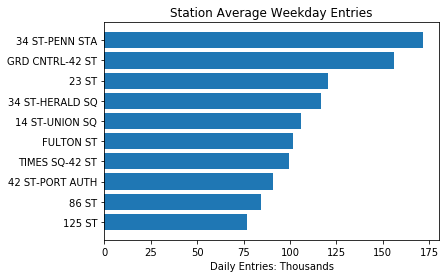

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
num_stations = 10
x = mta_mean_across_weekdays.head(num_stations).reset_index().sort_values(['INS'])['STATION']
y = mta_mean_across_weekdays.head(num_stations).reset_index().sort_values(['INS'])['INS']/1000
plt.barh(x,y)
#plt.xticks(rotation='vertical')
plt.title('Station Average Weekday Entries')
plt.xlabel('Daily Entries: Thousands')

Text(0.5, 0, 'Entries in Millions')

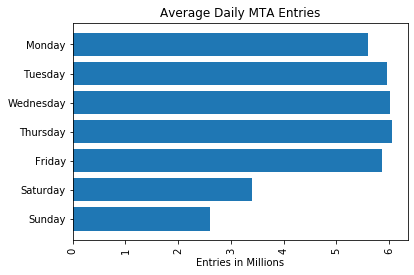

In [30]:
x = (mta_station_freqs
     .groupby(['DAY','DAYNAME'])
     .agg({'INS':'sum', 'OUTS':'sum'})
     .reset_index()
     .sort_values(['DAY'],ascending=False)
     ['DAYNAME']
    )
y = (mta_station_freqs
     .groupby('DAY')
     .agg({'INS':'sum', 'OUTS':'sum'})
     .reset_index()
     .sort_values(['DAY'],ascending=False)
     ['INS']/1000000
    )
plt.barh(x,y)
plt.xticks(rotation='vertical')
plt.title('Average Daily MTA Entries')
plt.xlabel('Entries in Millions')